In [1]:
import nmresearch as nmr

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
def slope_fit(data, start, end, t_list):
    if end > 35:
        return 0
    x = np.log(t_list[start: end])
    X = sm.add_constant(x)
    y = -np.log(data[start:end].flatten())
    ols = sm.OLS(y, X)
    ols_result = ols.fit()
    slopes = ols_result.params[1]
    intercept = ols_result.params[0]
    err = ols_result.conf_int()[1, 1] - ols_result.params[1]
    return slopes,intercept,err

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


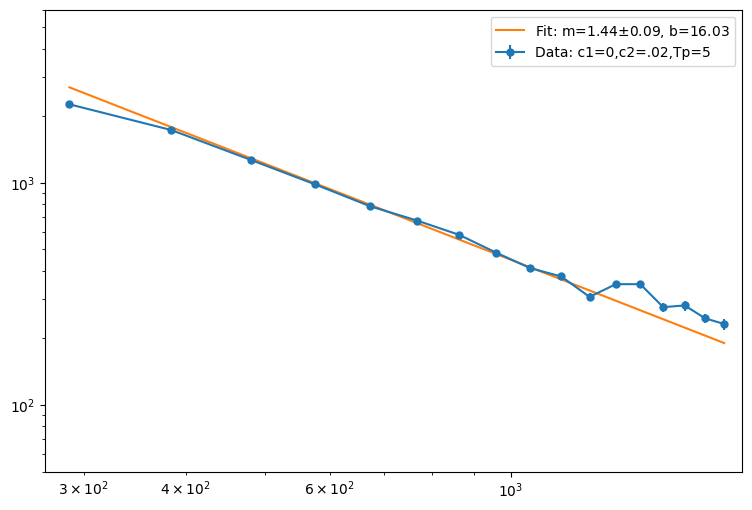

In [4]:
# 4/9, pp=ken_diff5_mid_fc12
# c1=0, c2=.02
# T0 = 3, Tf=20
# 5 prep cycles
expt = nmr.Experiment(623, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,2,11,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.02,Tp=5",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()


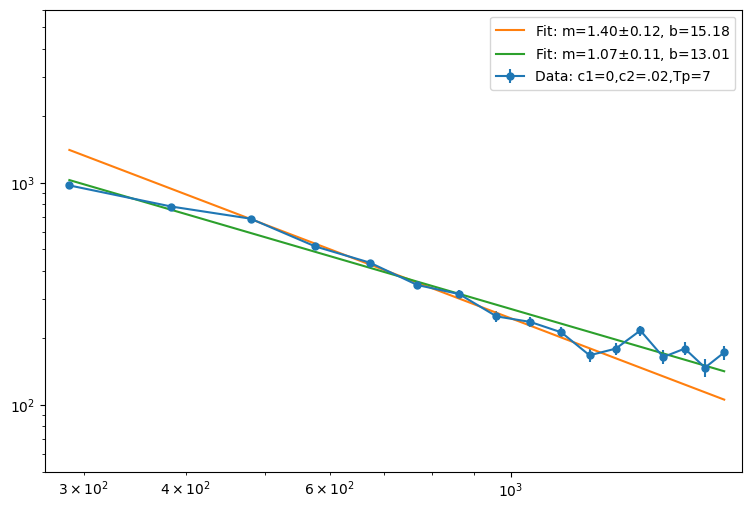

In [5]:
# 4/10, pp=ken_diff7_mid_fc12
# c1=0, c2=.02
# T0 = 3, Tf=20
# 7 prep cycles
expt = nmr.Experiment(625, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,2,11,times)
m0,b0,err0 = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.02,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.plot(times, np.exp(-m0*np.log(times)-b0), label=f"Fit: m={m0:.2f}"+ r"$\pm$" + f"{err0:.2f}, b={-b0:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

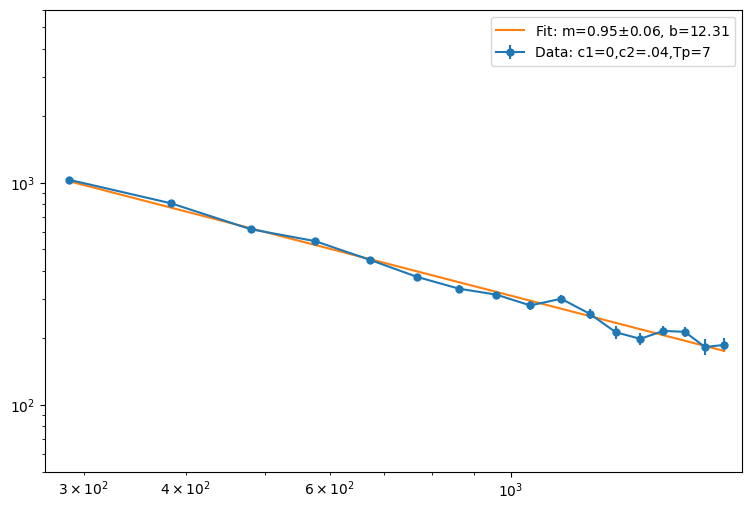

In [6]:
# 4/10, pp=ken_diff7_mid_fc12
# c1=0, c2=.04
# T0 = 3, Tf=20
# 7 prep cycles
# No retune before running experiment - off-resonant driving -> larger disorder?

expt = nmr.Experiment(629, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.04,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


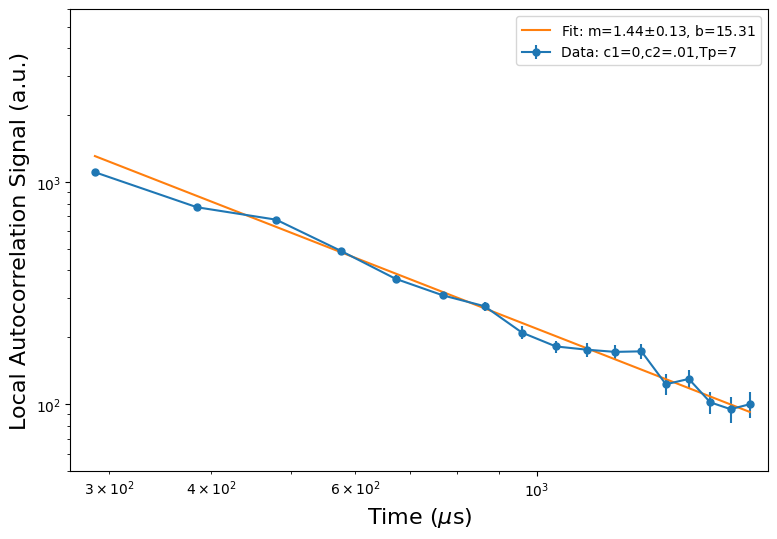

In [17]:
# 4/11, pp=ken_diff7_mid_fc12
# c1=0, c2=.01
# T0 = 3, Tf=20
# 7 prep cycles
expt = nmr.Experiment(631, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
T = 24*4
times = np.arange(3*T, 20*T,T)
m0,b0,err0 = slope_fit(data,0,17,times)
m,b,err = slope_fit(data,2,16,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.01,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
#ax.plot(times, np.exp(-m0*np.log(times)-b0), label=f"Fit: m={m0:.2f}"+ r"$\pm$" + f"{err0:.2f}, b={-b0:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.xlabel(r"Time ($\mu$s)", fontsize=16)
plt.ylabel(f"Local Autocorrelation Signal (a.u.)", fontsize=16)
plt.show()

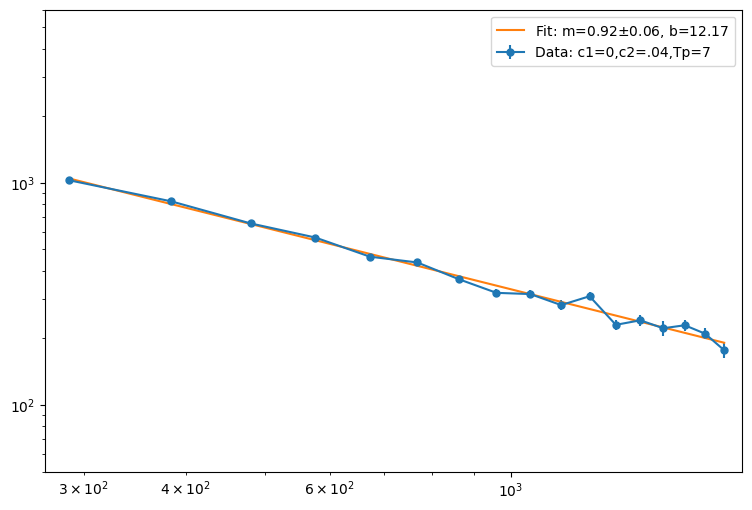

In [13]:
# 4/14, pp=ken_diff7_mid_fc12
# c1=0, c2=.04
# T0 = 3, Tf=20
# 7 prep cycles
# fresh tune

expt = nmr.Experiment(637, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 20*T,T)
m,b,err = slope_fit(data,0,17,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.04,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()

In [ ]:
# 4/16, pp=ken_diff5_direct_mid_fc12
# c1=0, c2=.04
# T0 = 3, Tf=18
# 5 prep cycles
# fresh tune - no solid echo

expt = nmr.Experiment(644, folder='expt9')
data = expt.load_tpc(normalize=False,use_real=False)
errs = np.std(np.real(expt.nmr_data)[:,-50:-1],axis=1)
times = np.arange(3*T, 18*T,T)
m,b,err = slope_fit(data,0,15,times)
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(times,data,errs,label=f"Data: c1=0,c2=.04,Tp=7",marker="o",markersize=5)
ax.plot(times, np.exp(-m*np.log(times)-b), label=f"Fit: m={m:.2f}"+ r"$\pm$" + f"{err:.2f}, b={-b:.2f}")
ax.legend()
plt.xlim(2.8*T, 20*T)
plt.ylim(5e1,6e3)
plt.show()